# Car Analysis

In this example, we will first examine the dataset created with the characteristics of "year", "price", "transmission", "milage", "tax", "mpg" and "engineSize" of used cars in the UK, and we will make the dataset more consistent by making some changes to it. 

We will then create a regression model that we will use for prediction and train our model with 70% of our dataset using features other than "price". 

Finally, we will try to estimate the "price" values of the cars using the model we trained and use error metrics for measuring the performance of the model.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_excel("merc.xlsx")
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [106]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


Checking for Null data in datasets is important in data science because missing or incomplete data can lead to inaccurate and biased analysis results, reduce the number of variables available for analysis, and potentially result in insufficient data for accurate modeling. Identifying and addressing Null data is crucial for obtaining accurate and reliable analysis results.

In [107]:
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

## Graphic Analysis

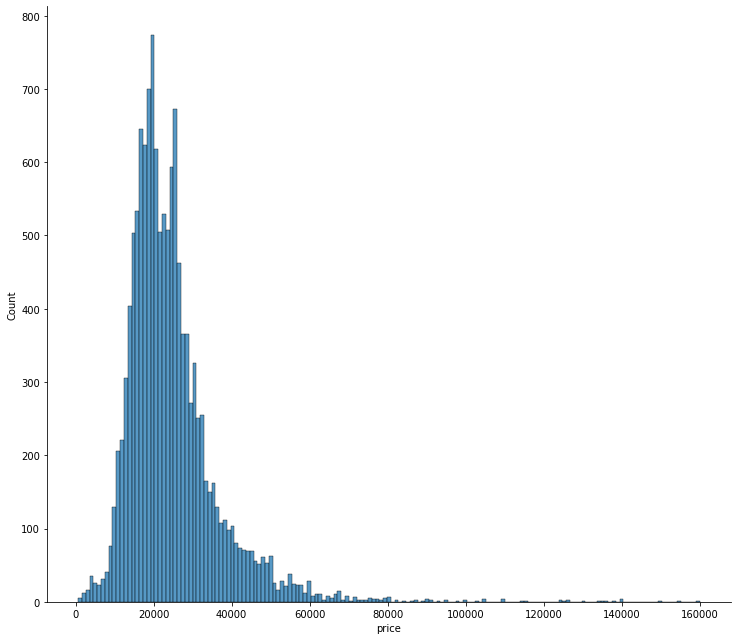

In [108]:
sns.displot(x = df["price"], height=9, aspect=1.15)

When we look at the graph above, we can see that there are very expensive cars that have deviated from the general spread. Depending on the data you are analyzing, you can either delete these extreme examples or train your model with these data. In this example, we will purify our data from these data. We will do this later in the Data Clearing section.

<Axes: xlabel='year', ylabel='count'>

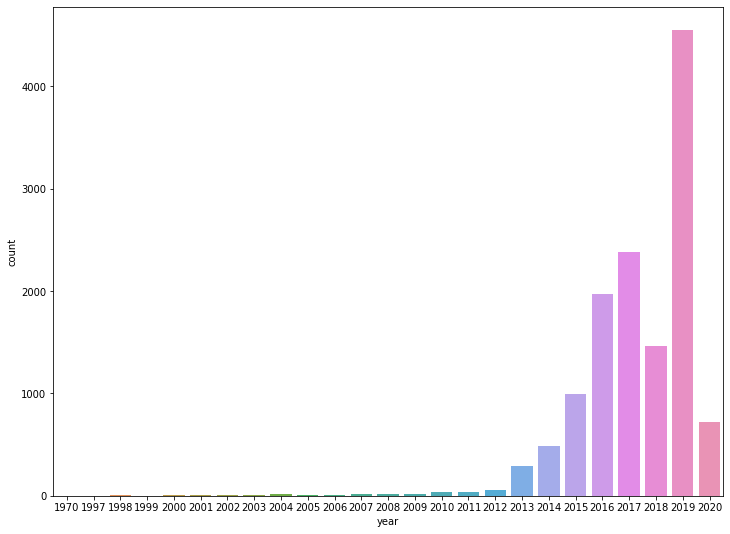

In [109]:
plt.figure(figsize=(12,9))
sns.countplot(x = df["year"])

As can be seen in the graphic above, the number of used cars produced in our data set close to today is higher than the number of used vehicles produced in earlier dates.

Below we see the correlation between features. While some features affect the "price" feature positively, some features affect it negatively.

In [110]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [111]:
df.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

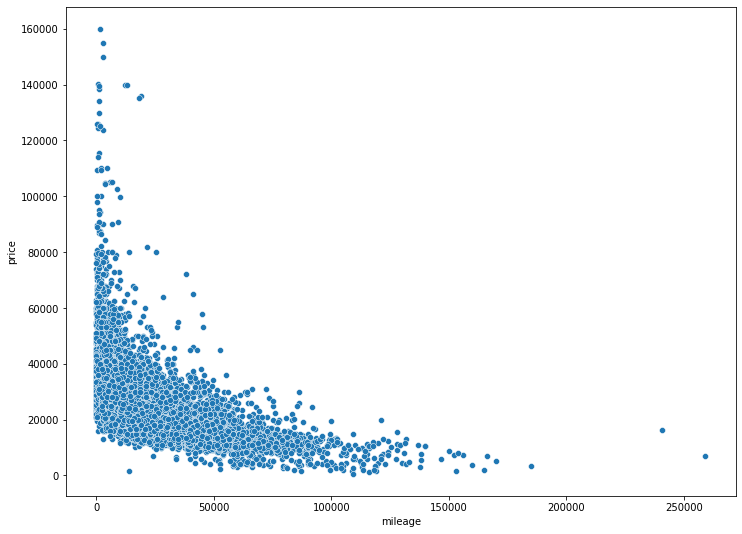

In [112]:
plt.figure(figsize=(12,9))
sns.scatterplot(x = "mileage", y = "price", data=df)

As can be seen in the graph, the price of our cars decreases as the miles traveled increase. There is an inverse correlation between these two features.

## Data Clearing

As I mentioned above, the prices of some of our cars are far outside the general price distribution. Although the deletion process of the data varies according to the data we analyze and the reason for our analysis, in this example, we will delete data up to 1% of our data number. The data we're going to delete will be the data with the highest price.

In [113]:
df.sort_values("price", ascending = False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [114]:
print("Length of Dataset:",len(df) , "Length of 1% of the Dataset: ",round(len(df) * 0.01))

Length of Dataset: 13119 Length of 1% of the Dataset:  131


In [115]:
df_without_expensive_cars = df.sort_values("price", ascending = False).iloc[131:]

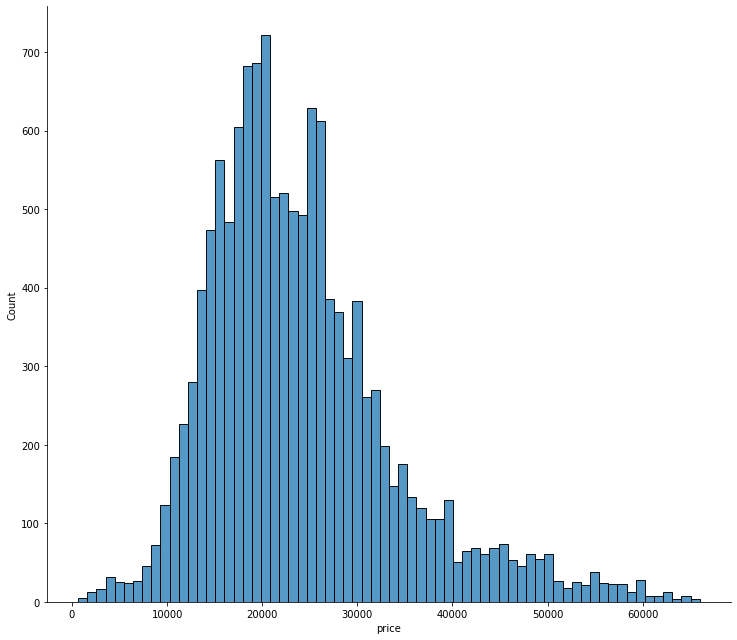

In [116]:
sns.displot(df_without_expensive_cars["price"], height=9, aspect=1.15)

Although we lost 1% of our data, we now have a more regular data set in terms of price feature.

In [117]:
df.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

When we look at the data above, the closer the years in which the cars were produced to the present, the higher their prices. But as an exception, the prices of the cars produced in 1970 are out of order and the prices are quite high. 

Due to some special reasons, such extreme deviations may occur in our data. Similar to what I did above, we will also extract this data from our dataset.

In [118]:
df_without_expensive_cars_and_1970 = df_without_expensive_cars[df_without_expensive_cars.year != 1970]

Let's assign the df_without_expensive_cars_and_1970 variable to the df variable to make our job easier.

In [119]:
df = df_without_expensive_cars_and_1970
df.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [120]:
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


We will remove our "transmission" feature from our data set as it is non-numeric.

In [121]:
df = df.drop("transmission", axis=1)
df.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


## Model Building

### Splitting The Data Into Train and Test

In [122]:
y = df["price"].values
X = df.drop("price",axis=1).values

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [125]:
print("Length of Train:",len(X_train),"Length of Test:",len(X_test))

Length of Train: 9090 Length of Test: 3897


### Scaling The Data

In [126]:
from sklearn.preprocessing import MinMaxScaler

In [127]:
scaler = MinMaxScaler()

In [128]:
X_train = scaler.fit_transform(X_train)

In [129]:
X_test = scaler.transform(X_test)

### Model Building

In [130]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [131]:
model = Sequential()

model.add(Dense(units = 12, activation="relu"))
model.add(Dense(units = 12, activation="relu"))
model.add(Dense(units = 12, activation="relu"))
model.add(Dense(units = 12, activation="relu"))

model.add(Dense(units = 1))

model.compile(optimizer="adam", loss="mse")

In [132]:
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), batch_size=250, epochs=300)

Epoch 1/300
37/37 [==============================] - 1s 9ms/step - loss: 672154688.0000 - val_loss: 688107904.0000
Epoch 2/300
37/37 [==============================] - 0s 4ms/step - loss: 672128896.0000 - val_loss: 688074496.0000
Epoch 3/300
37/37 [==============================] - 0s 5ms/step - loss: 672072192.0000 - val_loss: 687971264.0000
Epoch 4/300
37/37 [==============================] - 0s 4ms/step - loss: 671878720.0000 - val_loss: 687630528.0000
Epoch 5/300
37/37 [==============================] - 0s 3ms/step - loss: 671261440.0000 - val_loss: 686579264.0000
Epoch 6/300
37/37 [==============================] - 0s 4ms/step - loss: 669504640.0000 - val_loss: 683748352.0000
Epoch 7/300
37/37 [==============================] - 0s 4ms/step - loss: 665270400.0000 - val_loss: 677528384.0000
Epoch 8/300
37/37 [==============================] - 0s 4ms/step - loss: 656654400.0000 - val_loss: 665558720.0000
Epoch 9/300
37/37 [==============================] - 0s 5ms/step - loss: 6409867

In [133]:
lossData = pd.DataFrame(model.history.history)
lossData

,loss,val_loss
0,672154688.0,688107904.0
1,672128896.0,688074496.0
2,672072192.0,687971264.0
3,671878720.0,687630528.0
4,671261440.0,686579264.0
...,...,...
295,18899058.0,20406888.0
296,18861300.0,20401068.0
297,18839926.0,20399452.0
298,18841308.0,20401338.0


<Axes: >

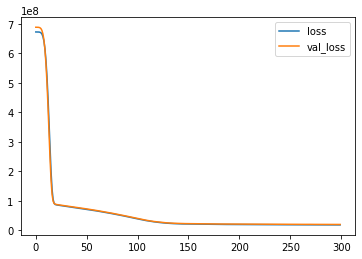

In [134]:
lossData.plot()

### Performance Metrics

Mean Absolute Error (MAE) and Mean Squared Error (MSE) are two commonly used error metrics for measuring the performance of a prediction model.

MAE measures the average of the absolute differences between the predicted values and the true values. It is typically preferred when the magnitude of the individual differences between predicted and true values is more important than the direction of those differences. MAE is calculated by taking the sum of the absolute differences between the predicted and true values across all examples and dividing by the number of examples.

MSE measures the average of the squared differences between the predicted values and the true values. It emphasizes larger differences between predicted and true values more than smaller differences, making it more sensitive to outliers. MSE is calculated by taking the sum of the squared differences between predicted and true values across all examples and dividing by the number of examples.

In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [136]:
y_pred = model.predict(X_test)

122/122 [==============================] - 0s 1ms/step


In [137]:
mean_absolute_error(y_test,y_pred)

3198.227105723854

In [138]:
mean_squared_error(y_test,y_pred)

20403283.297355395

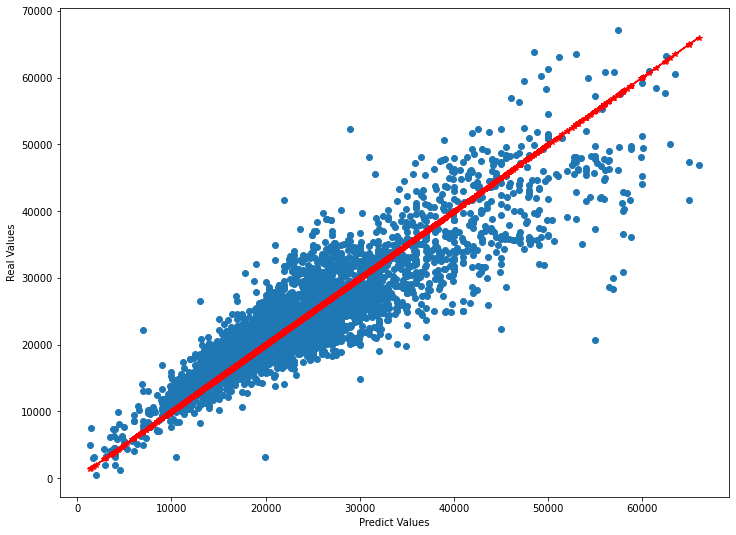

In [140]:
plt.figure(figsize=(12,9))
plt.scatter(y_test,y_pred)
plt.xlabel("Predict Values")
plt.ylabel("Real Values")
plt.plot(y_test,y_test,"r-*")